# NLP sobre reviews de videojuegos en Amazon

# Importar datos

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires

In [2]:
from datasets import load_dataset

ds = load_dataset("LoganKells/amazon_product_reviews_video_games")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
!pip install nltk

### Leer datos

In [4]:
df = ds['train'].to_pandas()

# Mostrar las primeras filas del DataFrame
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,0.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,3.0,Good rally game,1372550400,"06 30, 2013"
2,2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,0.0,Wrong key,1403913600,"06 28, 2014"
3,4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,3.0,DIRT 3,1308009600,"06 14, 2011"
4,5,A2UTRVO4FDCBH6,0700099867,A.R.G.,"[0, 0]","Overall this is a well done racing game, with ...",3.0,"Good racing game, terrible Windows Live Requir...",1368230400,"05 11, 2013"


In [5]:
df=df[['Unnamed: 0','reviewText','overall']]
df.head()

,Unnamed: 0,reviewText,overall
0,0,Installing the game was a struggle (because of...,0.0
1,1,If you like rally cars get this game you will ...,3.0
2,2,1st shipment received a book instead of the ga...,0.0
3,4,I had Dirt 2 on Xbox 360 and it was an okay ga...,3.0
4,5,"Overall this is a well done racing game, with ...",3.0


In [6]:
print(df.describe())

         Unnamed: 0       overall
count  50000.000000  50000.000000
mean   29228.090600      3.132300
std    17208.295237      1.171744
min        0.000000      0.000000
25%    14353.750000      3.000000
50%    28823.500000      4.000000
75%    43942.250000      4.000000
max    59648.000000      4.000000


In [7]:
  print("Total :\n",df['overall'].value_counts())

Total :
 overall
4.0    26650
3.0    11897
2.0     5708
1.0     2908
0.0     2837
Name: count, dtype: int64


### Explorando los datos

In [8]:
import numpy as np
# labels=data['sentimiento']
# labels=np.array(list(map(lambda x: 1 if x=="positivo" else 0, labels)))

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Asegúrate de tener las stop words en inglés
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
# df = pd.DataFrame(data)
df['reviewText'] = df['reviewText'].astype(str)

# Función para eliminar stop words
def remove_stopwords(review2):
    tokens = word_tokenize(review2)
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Aplicar la función al dataframe
df['reviewText'] = df['reviewText'].apply(remove_stopwords)
df.head(9)

,Unnamed: 0,reviewText,overall
0,0,Installing game struggle ( games windows live ...,0.0
1,1,like rally cars get game fun.It oriented & # 3...,3.0
2,2,1st shipment received book instead game.2nd sh...,0.0
3,4,Dirt 2 Xbox 360 okay game . started playing ga...,3.0
4,5,"Overall well done racing game , good graphics ...",3.0
5,6,Loved playing Dirt 2 thought graphics good . P...,4.0
6,7,ca n't tell piece dog * * * * game . Like ever...,0.0
7,8,initially gave one star crashing constantly re...,3.0
8,9,still n't figured one . everything instructed ...,1.0


### Eliminar etiquetas html contenidas


In [11]:
from bs4 import BeautifulSoup
import re
# df = pd.DataFrame(data)

# Función para eliminar etiquetas HTML
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    # Eliminar cualquier etiqueta HTML residual
    cleaned_text = re.sub('<.*?>', '', cleaned_text)
    return cleaned_text

# Aplicar la función al dataframe
df['reviewText'] = df['reviewText'].apply(remove_html_tags)
df.head(9)

<ipython-input-11-0adb991bf453>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,Unnamed: 0,reviewText,overall
0,0,Installing game struggle ( games windows live ...,0.0
1,1,like rally cars get game fun.It oriented & # 3...,3.0
2,2,1st shipment received book instead game.2nd sh...,0.0
3,4,Dirt 2 Xbox 360 okay game . started playing ga...,3.0
4,5,"Overall well done racing game , good graphics ...",3.0
5,6,Loved playing Dirt 2 thought graphics good . P...,4.0
6,7,ca n't tell piece dog * * * * game . Like ever...,0.0
7,8,initially gave one star crashing constantly re...,3.0
8,9,still n't figured one . everything instructed ...,1.0


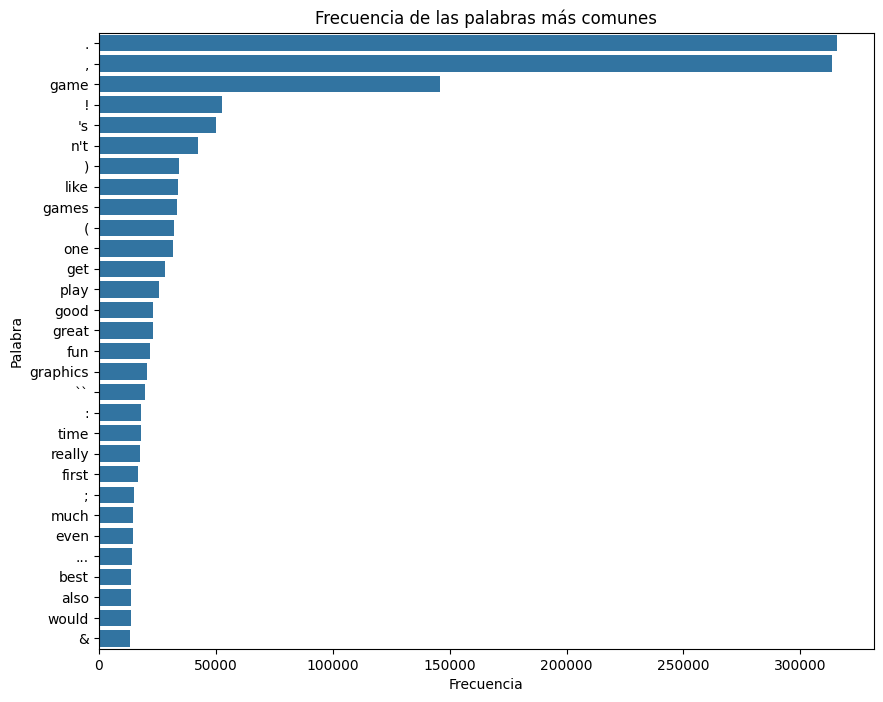

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenar todas las palabras en una lista
all_words = [word.lower() for text in df['reviewText'] for word in nltk.word_tokenize(text)]

# Conteo de frecuencia de cada palabra
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
most_common_words = word_freq.most_common(30)

# Gráfico de barras para mostrar la frecuencia de cada palabra
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 8))
sns.barplot(y=list(words), x=list(counts), orient='h')
plt.title('Frecuencia de las palabras más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

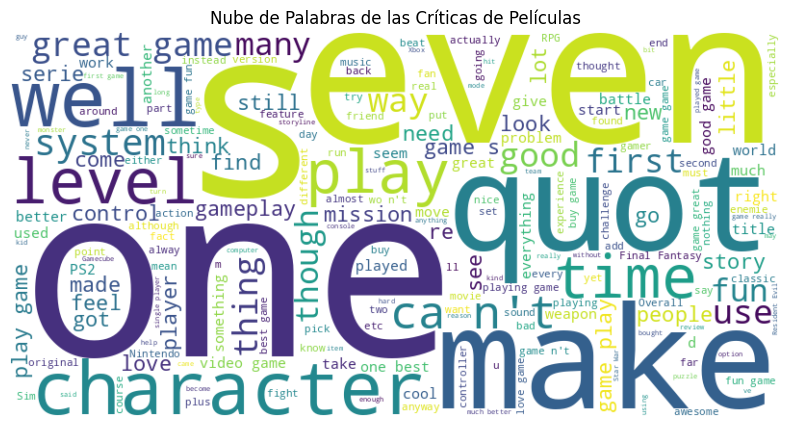

In [13]:
from wordcloud import WordCloud
# Unir todas las frases en un solo texto
text = " ".join([t for t in df['reviewText']])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Críticas de Películas')
plt.show()

In [14]:
review=[]
sentences=list(df['reviewText'])
labels=list(df['overall'].astype(int))
for i in sentences:
  review.append(i)

### Split dataset

In [15]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

### Tokenización y generación de secuencias

In [16]:
vocab_size=1000
max_length=120
embedding_dim=16
trunc_type='post'
oov_tok="<OOV>"

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(test_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [18]:
padded = np.array(padded)
train_labels = np.array(train_labels)
testing_padded = np.array(testing_padded)
test_labels = np.array(test_labels)

# Modelo
### Modelo de red

In [ ]:
import tensorflow as tf
# model=tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.LSTM(32),
#     tf.keras.layers.Dense(64, activation='relu'),
#     # tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compilación del modelo

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [ ]:
history=model.fit(padded, train_labels, epochs=10, validation_data=(testing_padded, test_labels))
pd.DataFrame(history.history).plot(grid=True)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 125s 96ms/step - accuracy: 0.5214 - loss: 1.7339 - val_accuracy: 0.5292 - val_loss: 1.2616
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 97ms/step - accuracy: 0.5342 - loss: 1.2602 - val_accuracy: 0.5292 - val_loss: 1.2570
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 98ms/step - accuracy: 0.5351 - loss: 1.2524 - val_accuracy: 0.5292 - val_loss: 1.2568
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 95ms/step - accuracy: 0.5391 - loss: 1.2479 - val_accuracy: 0.5292 - val_loss: 1.2565
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 97ms/step - accuracy: 0.5332 - loss: 1.2536 - val_accuracy: 0.5292 - val_loss: 1.2563
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 97ms/step - accuracy: 0.5396 - loss: 1.2454 - val_accuracy: 0.5292 - val_loss: 1.2564
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 96ms/step - accuracy: 0.5346 - loss: 1.2488 - val_accuracy: 0.5292 - val_loss: 1.2571
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 97ms/step - accuracy: 

NameError: name 'pd' is not defined

<Axes: >

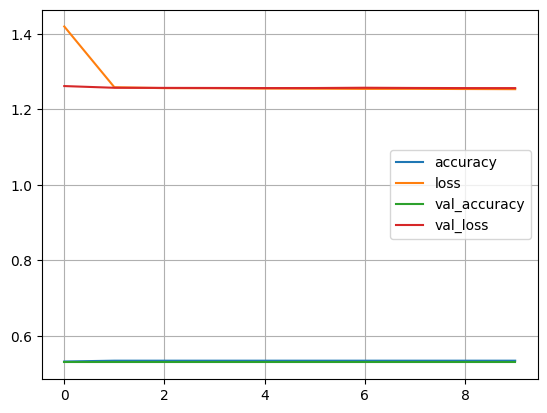

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

# Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predice las etiquetas para el conjunto de prueba
predicted_probabilities = model.predict(testing_padded)

# Selecciona la clase con la mayor probabilidad para cada muestra
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Las etiquetas verdaderas ya están en formato entero, no es necesario hacer np.argmax
true_labels = test_labels

# Calcula las métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Almacena los resultados en un diccionario y luego en un DataFrame
results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Modelo': ['NN']  # Puedes cambiar el nombre del modelo si estás usando otro modelo
}

results_df = pd.DataFrame(results)

# Imprime los resultados
print(results_df)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
   Accuracy  Precision  Recall  F1 Score Modelo
0    0.5292   0.280053  0.5292  0.366273     NN
Accuracy: 0.5292
Precision: 0.28005264
Recall: 0.5292
F1 score: 0.36627339785508767


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


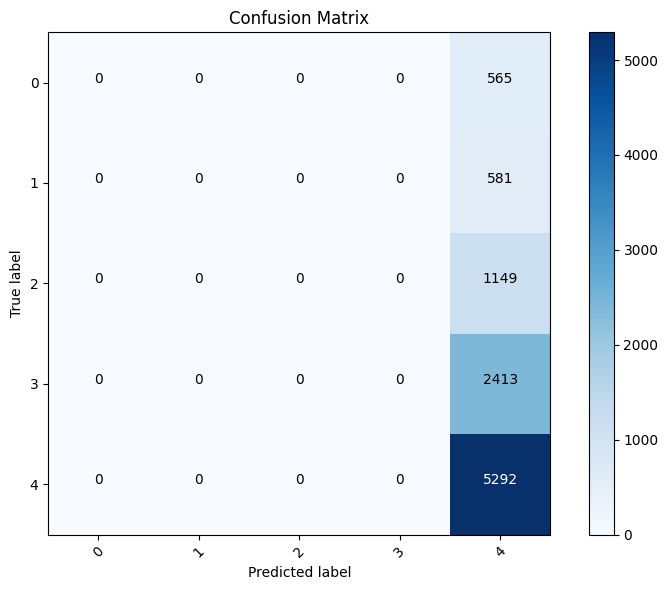

In [ ]:
# prompt: xticklabels=classifier.labels(), yticklabels=classifier.labels()
# adaptalo para una red neuronal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_labels' and 'true_labels' are defined from the previous code

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming binary classification)
class_labels = ["0", "1","2", "3","4"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


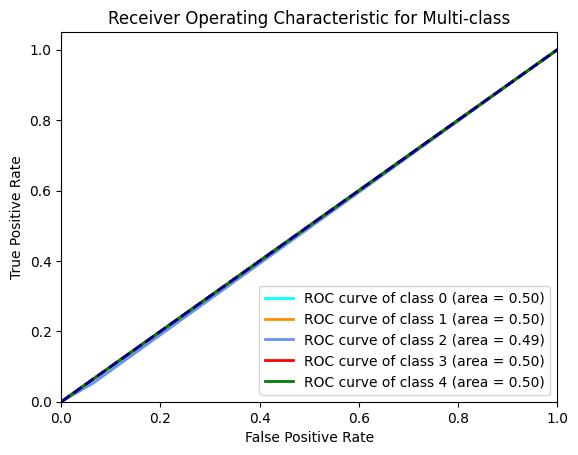

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes 5 clases
num_classes = 5

# Convertimos las etiquetas verdaderas a formato binarizado (one-hot encoding)
true_labels_binarized = label_binarize(test_labels, classes=np.arange(num_classes))

# Predicciones de probabilidad para cada clase
y_pred_proba = model.predict(testing_padded)

# Calculamos la ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Frases de ejemplo
new_sentences = [
    "This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.",
    "I loved this film! It was so moving and the characters were so well-developed.",
    "The special effects were amazing, but the story was a bit lacking.",
    "I couldn't even finish watching this movie, it was so boring.",
    "A masterpiece of cinema, a must-watch for everyone."
]

# Tokenizar y rellenar las nuevas frases
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# Predecir el sentimiento de las nuevas frases
predictions = model.predict(new_padded)

# Definir etiquetas de clase (puedes adaptarlas según tus clases)
class_labels = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

# Imprimir los resultados
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)  # Selecciona la clase con la probabilidad más alta
    sentiment = class_labels[predicted_class]
    print(f"Frase: {new_sentences[i]}")
    print(f"Sentimiento predicho: {sentiment} (Probabilidades: {prediction})")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Frase: This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.
Sentimiento predicho: Very Positive (Probabilidades: [0.05796457 0.05728577 0.11520035 0.2382473  0.531302  ])

Frase: I loved this film! It was so moving and the characters were so well-developed.
Sentimiento predicho: Very Positive (Probabilidades: [0.05796457 0.05728577 0.11520035 0.2382473  0.531302  ])

Frase: The special effects were amazing, but the story was a bit lacking.
Sentimiento predicho: Very Positive (Probabilidades: [0.05796457 0.05728577 0.11520035 0.2382473  0.531302  ])

Frase: I couldn't even finish watching this movie, it was so boring.
Sentimiento predicho: Very Positive (Probabilidades: [0.05796457 0.05728577 0.11520035 0.2382473  0.531302  ])

Frase: A masterpiece of cinema, a must-watch for everyone.
Sentimiento predicho: Very Positive (Probabilidades: [0.05796457 0.05728577 0.11520035 0.2382473  0.531302  ])



[4 4 4 ... 4 4 4]


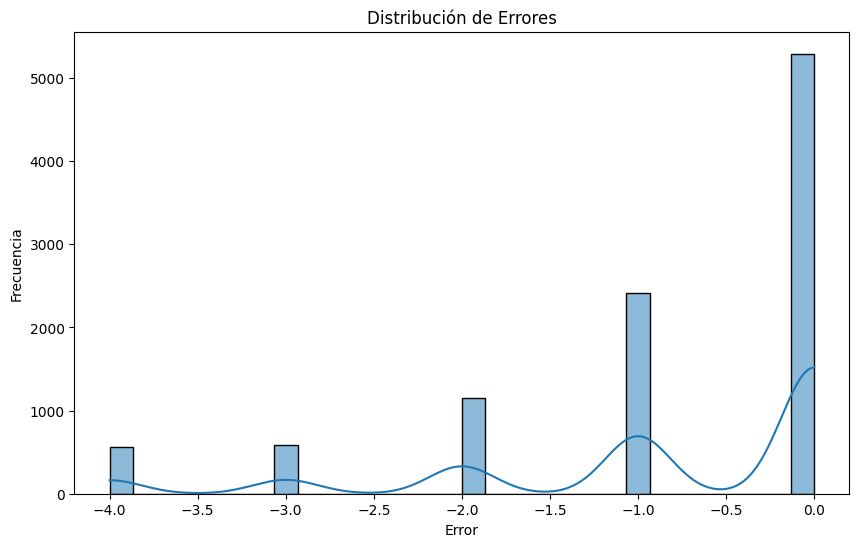

Accuracy: 0.5292


In [ ]:
# Calcular errores
predicted_labels = predicted_labels.flatten()
print(predicted_labels)
y_test = test_labels #[1 if x == 'positive' else 0 for x in test_labels]
y_pred = predicted_labels #[1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Model 2

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Bidirectional LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    tf.keras.layers.Dropout(0.5),

    # Another Bidirectional LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    tf.keras.layers.Dropout(0.5),

    # Global Max Pooling
    tf.keras.layers.GlobalMaxPooling1D(),

    # Dense Layers
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(5, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compilación del modelo

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 265s 202ms/step - accuracy: 0.5207 - loss: 2.1129 - val_accuracy: 0.5292 - val_loss: 1.2621
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 249s 199ms/step - accuracy: 0.5350 - loss: 1.2574 - val_accuracy: 0.5292 - val_loss: 1.2585
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 250s 200ms/step - accuracy: 0.5320 - loss: 1.2638 - val_accuracy: 0.5292 - val_loss: 1.2569
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 257s 205ms/step - accuracy: 0.5348 - loss: 1.2529 - val_accuracy: 0.5292 - val_loss: 1.2563
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 256s 200ms/step - accuracy: 0.5274 - loss: 1.2642 - val_accuracy: 0.5292 - val_loss: 1.2568
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 284s 227ms/step - accuracy: 0.5350 - loss: 1.2548 - val_accuracy: 0.5292 - val_loss: 1.2563
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 331s 234ms/step - accuracy: 0.5350 - loss: 1.2529 - val_accuracy: 0.5292 - val_loss: 1.2570
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 280s 201ms/step - ac

<Axes: >

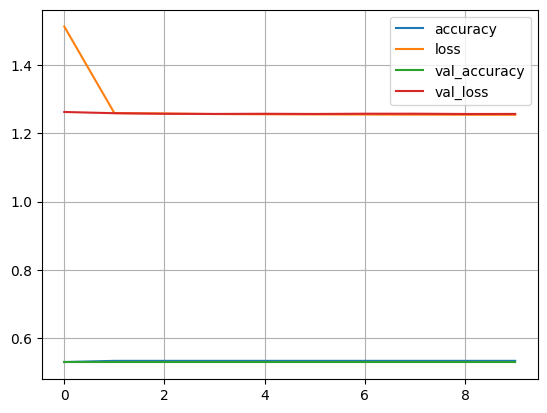

In [ ]:
history=model.fit(padded, train_labels, epochs=10, validation_data=(testing_padded, test_labels))
pd.DataFrame(history.history).plot(grid=True)

# Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predice las etiquetas para el conjunto de prueba
predicted_probabilities = model.predict(testing_padded)

# Selecciona la clase con la mayor probabilidad para cada muestra
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Las etiquetas verdaderas ya están en formato entero, no es necesario hacer np.argmax
true_labels = test_labels

# Calcula las métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Almacena los resultados en un diccionario y luego en un DataFrame
new_results_df = pd.DataFrame([{
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Modelo': 'NN2'  # Cambia el nombre del modelo si es necesario
}])

# Concatenar el DataFrame existente con el nuevo
results_df = pd.concat([results_df, new_results_df], ignore_index=True)

# Imprime los resultados
print(results_df)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step
   Accuracy  Precision  Recall  F1 Score Modelo
0    0.5292   0.280053  0.5292  0.366273     NN
1    0.5292   0.280053  0.5292  0.366273    NN2
Accuracy: 0.5292
Precision: 0.28005264
Recall: 0.5292
F1 score: 0.36627339785508767


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


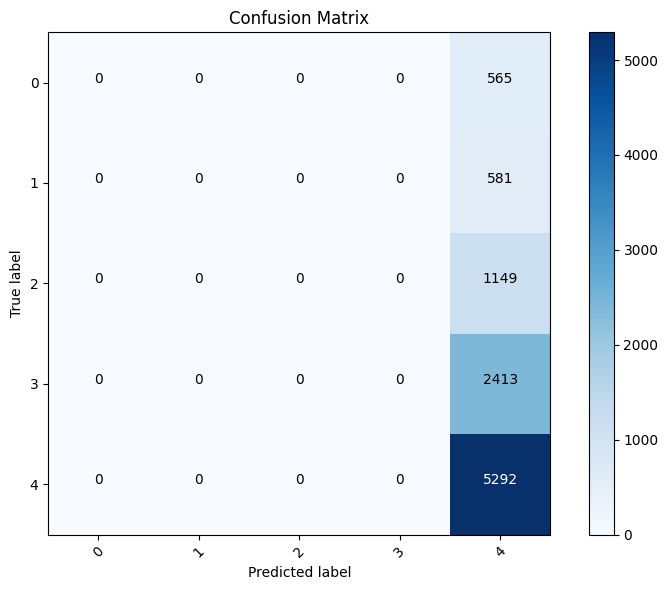

In [ ]:
# prompt: xticklabels=classifier.labels(), yticklabels=classifier.labels()
# adaptalo para una red neuronal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_labels' and 'true_labels' are defined from the previous code

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming binary classification)
class_labels = ["0", "1","2", "3","4"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step


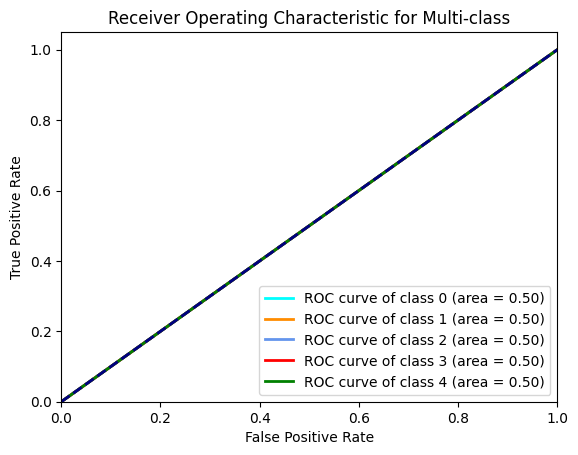

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes 5 clases
num_classes = 5

# Convertimos las etiquetas verdaderas a formato binarizado (one-hot encoding)
true_labels_binarized = label_binarize(test_labels, classes=np.arange(num_classes))

# Predicciones de probabilidad para cada clase
y_pred_proba = model.predict(testing_padded)

# Calculamos la ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Frases de ejemplo
new_sentences = [
    "This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.",
    "I loved this film! It was so moving and the characters were so well-developed.",
    "The special effects were amazing, but the story was a bit lacking.",
    "I couldn't even finish watching this movie, it was so boring.",
    "A masterpiece of cinema, a must-watch for everyone."
]

# Tokenizar y rellenar las nuevas frases
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# Predecir el sentimiento de las nuevas frases
predictions = model.predict(new_padded)

# Definir etiquetas de clase (puedes adaptarlas según tus clases)
class_labels = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

# Imprimir los resultados
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)  # Selecciona la clase con la probabilidad más alta
    sentiment = class_labels[predicted_class]
    print(f"Frase: {new_sentences[i]}")
    print(f"Sentimiento predicho: {sentiment} (Probabilidades: {prediction})")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Frase: This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.
Sentimiento predicho: Very Positive (Probabilidades: [0.25128627 0.24728835 0.3867101  0.572543   0.7526959 ])

Frase: I loved this film! It was so moving and the characters were so well-developed.
Sentimiento predicho: Very Positive (Probabilidades: [0.25128627 0.24728835 0.3867101  0.572543   0.7526959 ])

Frase: The special effects were amazing, but the story was a bit lacking.
Sentimiento predicho: Very Positive (Probabilidades: [0.25128627 0.24728835 0.3867101  0.572543   0.7526959 ])

Frase: I couldn't even finish watching this movie, it was so boring.
Sentimiento predicho: Very Positive (Probabilidades: [0.25128627 0.24728835 0.3867101  0.572543   0.7526959 ])

Frase: A masterpiece of cinema, a must-watch for everyone.
Sentimiento predicho: Very Positive (Probabilidades: [0.25128627 0.24728835 0.3867101  0.572543   0.752696  ])



[4 4 4 ... 4 4 4]


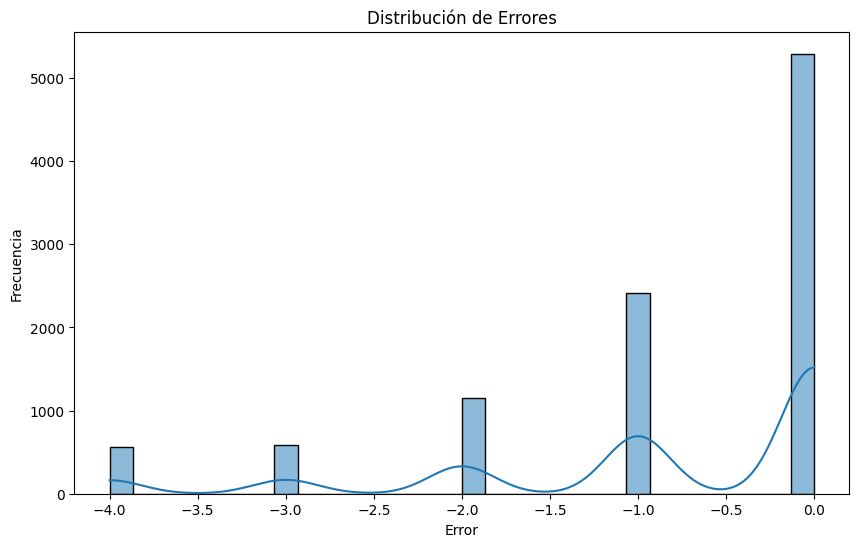

Accuracy: 0.5292


In [ ]:
# Calcular errores
predicted_labels = predicted_labels.flatten()
print(predicted_labels)
y_test = test_labels #[1 if x == 'positive' else 0 for x in test_labels]
y_pred = predicted_labels #[1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Modelo 3

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      tf.keras.layers.Dropout(0.25),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compilación del modelo

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 110ms/step - accuracy: 0.5106 - loss: 1.3863 - val_accuracy: 0.5292 - val_loss: 1.1718
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 123s 98ms/step - accuracy: 0.5366 - loss: 1.1609 - val_accuracy: 0.5292 - val_loss: 1.1992
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 97ms/step - accuracy: 0.5371 - loss: 1.1593 - val_accuracy: 0.5292 - val_loss: 1.1394
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 97ms/step - accuracy: 0.5307 - loss: 1.1352 - val_accuracy: 0.5292 - val_loss: 1.1297
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 96ms/step - accuracy: 0.5375 - loss: 1.0979 - val_accuracy: 0.5292 - val_loss: 1.0825
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 96ms/step - accuracy: 0.5346 - loss: 1.0920 - val_accuracy: 0.5292 - val_loss: 1.0772
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 96ms/step - accuracy: 0.5428 - loss: 1.0807 - val_accuracy: 0.5466 - val_loss: 1.0721
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 98ms/step - accuracy:

<Axes: >

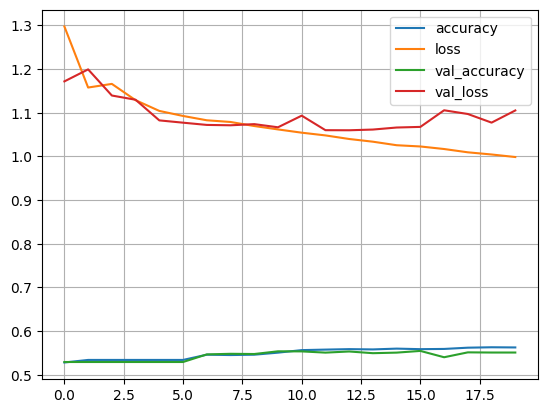

In [ ]:
history=model.fit(padded, train_labels, epochs=20, validation_data=(testing_padded, test_labels))
pd.DataFrame(history.history).plot(grid=True)

# Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predice las etiquetas para el conjunto de prueba
predicted_probabilities = model.predict(testing_padded)

# Selecciona la clase con la mayor probabilidad para cada muestra
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Las etiquetas verdaderas ya están en formato entero, no es necesario hacer np.argmax
true_labels = test_labels

# Calcula las métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Almacena los resultados en un diccionario y luego en un DataFrame
new_results_df = pd.DataFrame([{
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Modelo': 'NN3'  # Cambia el nombre del modelo si es necesario
}])

# Concatenar el DataFrame existente con el nuevo
results_df = pd.concat([results_df, new_results_df], ignore_index=True)

# Imprime los resultados
print(results_df)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step
   Accuracy  Precision  Recall  F1 Score Modelo
0    0.5292   0.280053  0.5292  0.366273     NN
1    0.5292   0.280053  0.5292  0.366273    NN2
2    0.5509   0.426207  0.5509  0.448201    NN3
Accuracy: 0.5509
Precision: 0.42620653007644477
Recall: 0.5509
F1 score: 0.448200817567607


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


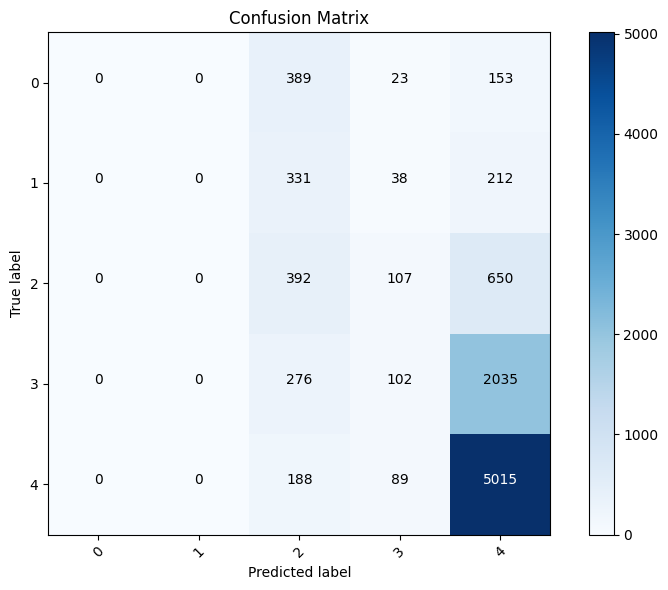

In [ ]:
# prompt: xticklabels=classifier.labels(), yticklabels=classifier.labels()
# adaptalo para una red neuronal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_labels' and 'true_labels' are defined from the previous code

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming binary classification)
class_labels = ["0", "1","2", "3","4"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


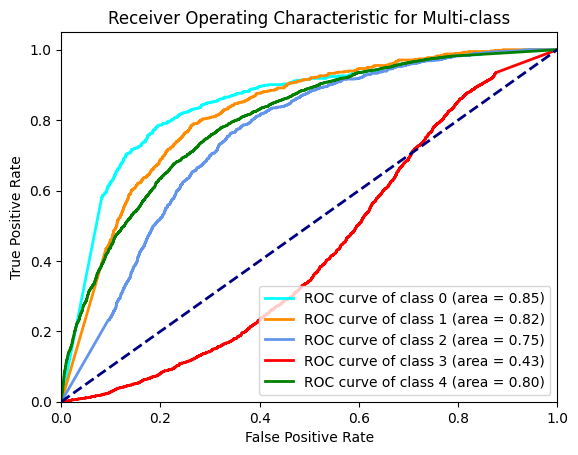

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes 5 clases
num_classes = 5

# Convertimos las etiquetas verdaderas a formato binarizado (one-hot encoding)
true_labels_binarized = label_binarize(test_labels, classes=np.arange(num_classes))

# Predicciones de probabilidad para cada clase
y_pred_proba = model.predict(testing_padded)

# Calculamos la ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Frases de ejemplo
new_sentences = [
    "This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.",
    "I loved this film! It was so moving and the characters were so well-developed.",
    "The special effects were amazing, but the story was a bit lacking.",
    "I couldn't even finish watching this movie, it was so boring.",
    "A masterpiece of cinema, a must-watch for everyone."
]

# Tokenizar y rellenar las nuevas frases
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# Predecir el sentimiento de las nuevas frases
predictions = model.predict(new_padded)

# Definir etiquetas de clase (puedes adaptarlas según tus clases)
class_labels = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

# Imprimir los resultados
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)  # Selecciona la clase con la probabilidad más alta
    sentiment = class_labels[predicted_class]
    print(f"Frase: {new_sentences[i]}")
    print(f"Sentimiento predicho: {sentiment} (Probabilidades: {prediction})")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Frase: This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.
Sentimiento predicho: Neutral (Probabilidades: [0.5193054  0.49436328 0.5560151  0.5003747  0.45478624])

Frase: I loved this film! It was so moving and the characters were so well-developed.
Sentimiento predicho: Very Positive (Probabilidades: [0.00895599 0.02386883 0.253187   0.66743636 0.79183006])

Frase: The special effects were amazing, but the story was a bit lacking.
Sentimiento predicho: Very Positive (Probabilidades: [0.01667252 0.03822929 0.28717822 0.64703715 0.75723124])

Frase: I couldn't even finish watching this movie, it was so boring.
Sentimiento predicho: Neutral (Probabilidades: [0.5193054  0.49436328 0.5560151  0.5003747  0.45478624])

Frase: A masterpiece of cinema, a must-watch for everyone.
Sentimiento predicho: Very Positive (Probabilidades: [1.0777256e-05 1.3623459e-04 5.1199734e-02 8.4241772e-01 9.6991396e-01])



[4 4 4 ... 4 4 4]


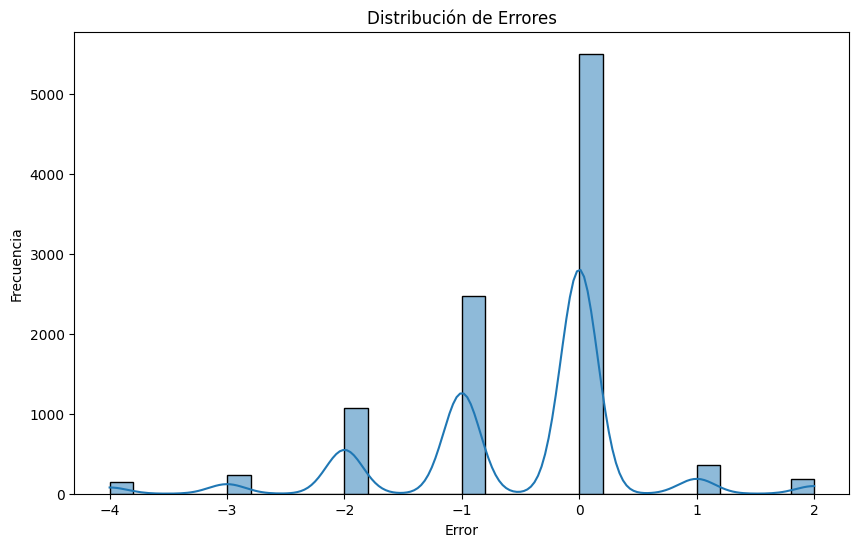

Accuracy: 0.5509


In [ ]:
# Calcular errores
predicted_labels = predicted_labels.flatten()
print(predicted_labels)
y_test = test_labels #[1 if x == 'positive' else 0 for x in test_labels]
y_pred = predicted_labels #[1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# prompt: predicted_labels
# array([[1],
#        [0],
#        [0],
#        ...,
#        [0],
#        [1],
#        [1]])
# elimina los corchetes de cada posición

predicted_labels = predicted_labels.flatten()
print(predicted_labels)


# Modelo 4

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(6, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Compilación del modelo

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 109ms/step - accuracy: 0.5373 - loss: 1.2026 - val_accuracy: 0.5619 - val_loss: 1.0590
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 100ms/step - accuracy: 0.5646 - loss: 1.0540 - val_accuracy: 0.5593 - val_loss: 1.0763
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 134s 94ms/step - accuracy: 0.5702 - loss: 1.0263 - val_accuracy: 0.5743 - val_loss: 1.0338
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 92ms/step - accuracy: 0.5795 - loss: 1.0122 - val_accuracy: 0.5877 - val_loss: 1.0220
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 152s 100ms/step - accuracy: 0.5988 - loss: 0.9660 - val_accuracy: 0.5882 - val_loss: 1.0013
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.6081 - loss: 0.9464 - val_accuracy: 0.5947 - val_loss: 0.9800
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 118s 95ms/step - accuracy: 0.6091 - loss: 0.9397 - val_accuracy: 0.5897 - val_loss: 0.9907
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 92ms/step - accurac

<Axes: >

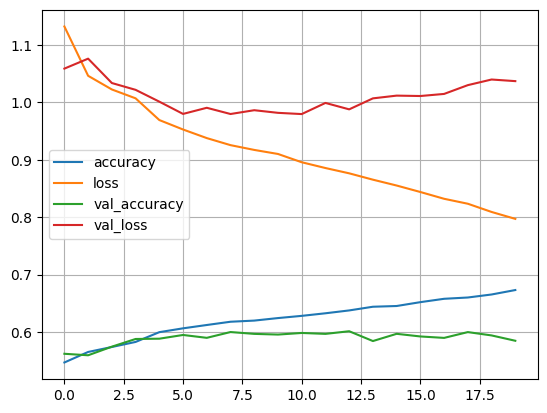

In [ ]:
history=model.fit(padded, train_labels, epochs=20, validation_data=(testing_padded, test_labels))
pd.DataFrame(history.history).plot(grid=True)

# Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predice las etiquetas para el conjunto de prueba
predicted_probabilities = model.predict(testing_padded)

# Selecciona la clase con la mayor probabilidad para cada muestra
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Las etiquetas verdaderas ya están en formato entero, no es necesario hacer np.argmax
true_labels = test_labels

# Calcula las métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Almacena los resultados en un diccionario y luego en un DataFrame
new_results_df = pd.DataFrame([{
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Modelo': 'NN4'  # Cambia el nombre del modelo si es necesario
}])

# Concatenar el DataFrame existente con el nuevo
results_df = pd.concat([results_df, new_results_df], ignore_index=True)

# Imprime los resultados
print(results_df)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
   Accuracy  Precision  Recall  F1 Score Modelo
0    0.5292   0.280053  0.5292  0.366273     NN
1    0.5292   0.280053  0.5292  0.366273    NN2
2    0.5509   0.426207  0.5509  0.448201    NN3
3    0.5846   0.559045  0.5846  0.566876    NN4
Accuracy: 0.5846
Precision: 0.559044654047348
Recall: 0.5846
F1 score: 0.566876130896523


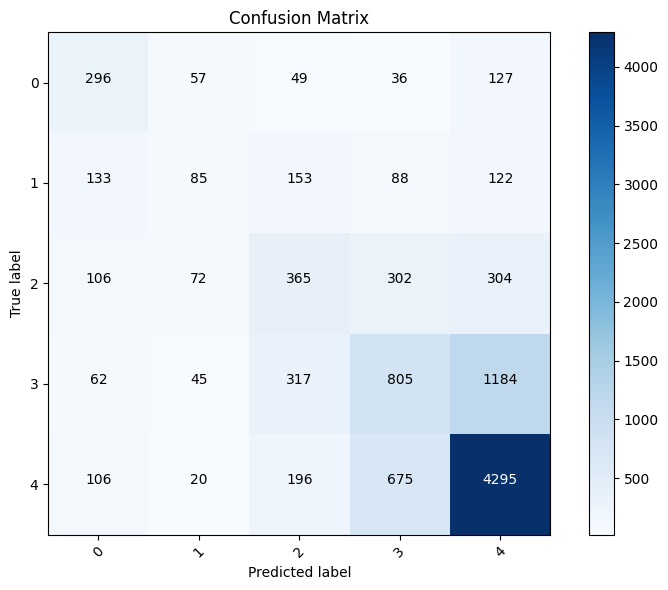

In [ ]:
# prompt: xticklabels=classifier.labels(), yticklabels=classifier.labels()
# adaptalo para una red neuronal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_labels' and 'true_labels' are defined from the previous code

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming binary classification)
class_labels = ["0", "1","2", "3","4"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


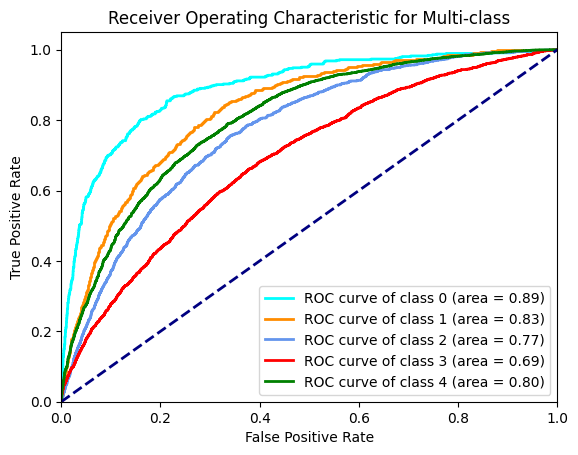

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes 5 clases
num_classes = 5

# Convertimos las etiquetas verdaderas a formato binarizado (one-hot encoding)
true_labels_binarized = label_binarize(test_labels, classes=np.arange(num_classes))

# Predicciones de probabilidad para cada clase
y_pred_proba = model.predict(testing_padded)

# Calculamos la ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Frases de ejemplo
new_sentences = [
    "This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.",
    "I loved this film! It was so moving and the characters were so well-developed.",
    "The special effects were amazing, but the story was a bit lacking.",
    "I couldn't even finish watching this movie, it was so boring.",
    "A masterpiece of cinema, a must-watch for everyone."
]

# Tokenizar y rellenar las nuevas frases
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# Predecir el sentimiento de las nuevas frases
predictions = model.predict(new_padded)

# Definir etiquetas de clase (puedes adaptarlas según tus clases)
class_labels = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

# Imprimir los resultados
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)  # Selecciona la clase con la probabilidad más alta
    sentiment = class_labels[predicted_class]
    print(f"Frase: {new_sentences[i]}")
    print(f"Sentimiento predicho: {sentiment} (Probabilidades: {prediction})")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Frase: This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.
Sentimiento predicho: Very Negative (Probabilidades: [0.9332759  0.7311731  0.4626403  0.16649327 0.24693103])

Frase: I loved this film! It was so moving and the characters were so well-developed.
Sentimiento predicho: Very Positive (Probabilidades: [0.00745004 0.02839128 0.19987933 0.5473769  0.65461195])

Frase: The special effects were amazing, but the story was a bit lacking.
Sentimiento predicho: Very Positive (Probabilidades: [8.5042784e-04 2.5807752e-03 5.7400990e-02 4.2872265e-01 8.5225517e-01])

Frase: I couldn't even finish watching this movie, it was so boring.
Sentimiento predicho: Very Negative (Probabilidades: [0.7409546  0.73989993 0.58819085 0.35469353 0.23494944])

Frase: A masterpiece of cinema, a must-watch for everyone.
Sentimiento predicho: Very Positive (Probabilidades: [0.00099432 0.00204064 0.03303831 0.41680142 0.89133734])



[4 4 2 ... 4 3 3]


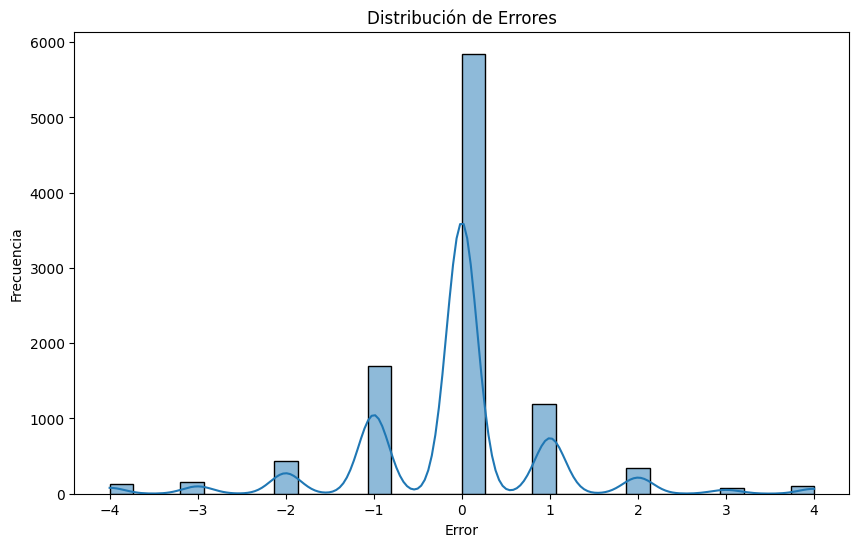

Accuracy: 0.5846


In [ ]:
# Calcular errores
predicted_labels = predicted_labels.flatten()
print(predicted_labels)
y_test = test_labels #[1 if x == 'positive' else 0 for x in test_labels]
y_pred = predicted_labels #[1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

<Axes: xlabel='Modelo'>

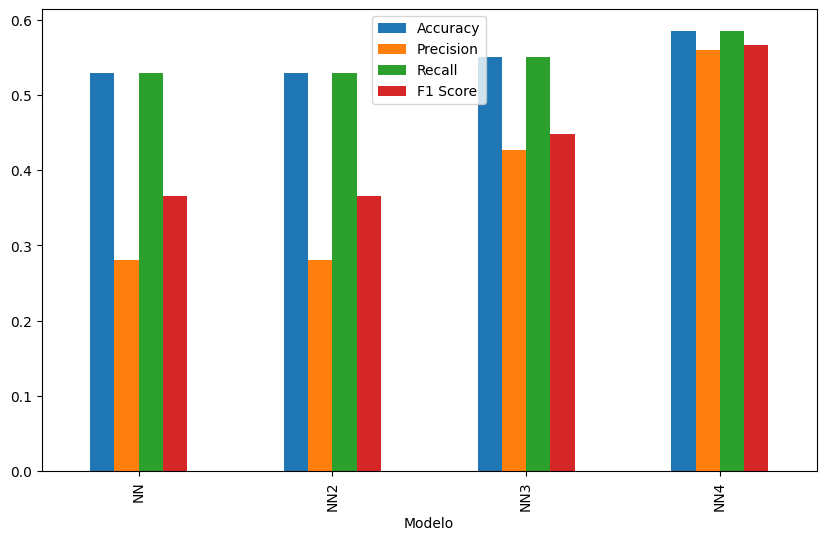

In [ ]:
results_df.plot(x='Modelo', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar', figsize=(10, 6))

# Modelo 5

In [20]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compilación del modelo

In [22]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [23]:
history=model.fit(padded, train_labels, epochs=20, validation_data=(testing_padded, test_labels))
pd.DataFrame(history.history).plot(grid=True)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 111ms/step - accuracy: 0.5291 - loss: 1.2250 - val_accuracy: 0.5694 - val_loss: 1.0673
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 132s 106ms/step - accuracy: 0.5519 - loss: 1.0798 - val_accuracy: 0.5576 - val_loss: 1.0645
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.5668 - loss: 1.0364 - val_accuracy: 0.5857 - val_loss: 1.0095
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.5858 - loss: 1.0027 - val_accuracy: 0.5820 - val_loss: 1.0081
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 109ms/step - accuracy: 0.5999 - loss: 0.9792 - val_accuracy: 0.5942 - val_loss: 0.9960
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 107ms/step - accuracy: 0.5974 - loss: 0.9691 - val_accuracy: 0.5933 - val_loss: 0.9969
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 106ms/step - accuracy: 0.5961 - loss: 0.9681 - val_accuracy: 0.5707 - val_loss: 1.0310
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - ac

NameError: name 'pd' is not defined

<Axes: >

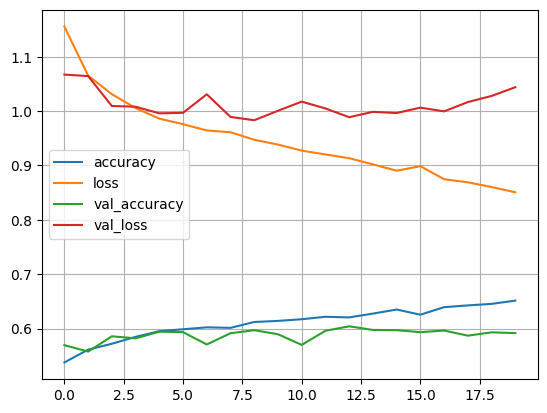

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(grid=True)

# Evaluación del modelo

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predice las etiquetas para el conjunto de prueba
predicted_probabilities = model.predict(testing_padded)

# Selecciona la clase con la mayor probabilidad para cada muestra
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Las etiquetas verdaderas ya están en formato entero, no es necesario hacer np.argmax
true_labels = test_labels

# Calcula las métricas
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Modelo': ['NN']  # Puedes cambiar el nombre del modelo si estás usando otro modelo
}

results_df = pd.DataFrame(results)

# Imprime los resultados
print(results_df)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step
   Accuracy  Precision  Recall  F1 Score Modelo
0    0.5916   0.553474  0.5916  0.554146     NN
Accuracy: 0.5916
Precision: 0.5534735896486769
Recall: 0.5916
F1 score: 0.5541461703066367


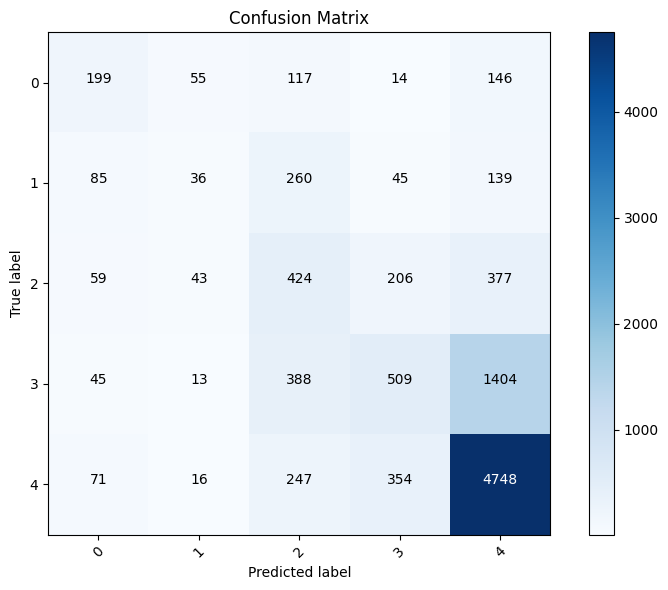

In [27]:
# prompt: xticklabels=classifier.labels(), yticklabels=classifier.labels()
# adaptalo para una red neuronal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_labels' and 'true_labels' are defined from the previous code

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming binary classification)
class_labels = ["0", "1","2", "3","4"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


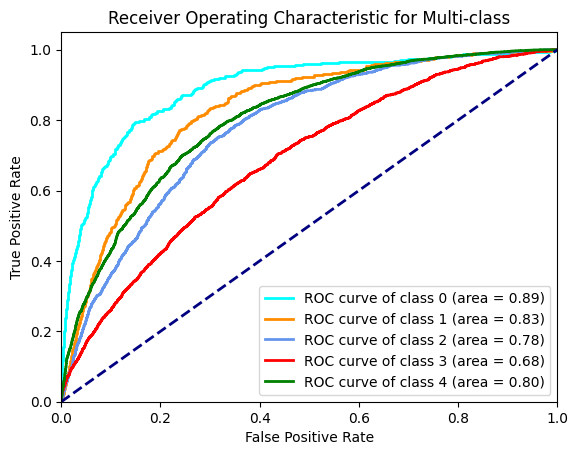

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes 5 clases
num_classes = 5

# Convertimos las etiquetas verdaderas a formato binarizado (one-hot encoding)
true_labels_binarized = label_binarize(test_labels, classes=np.arange(num_classes))

# Predicciones de probabilidad para cada clase
y_pred_proba = model.predict(testing_padded)

# Calculamos la ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [29]:
# Frases de ejemplo
new_sentences = [
    "This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.",
    "I loved this film! It was so moving and the characters were so well-developed.",
    "The special effects were amazing, but the story was a bit lacking.",
    "I couldn't even finish watching this movie, it was so boring.",
    "A masterpiece of cinema, a must-watch for everyone."
]

# Tokenizar y rellenar las nuevas frases
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# Predecir el sentimiento de las nuevas frases
predictions = model.predict(new_padded)

# Definir etiquetas de clase (puedes adaptarlas según tus clases)
class_labels = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

# Imprimir los resultados
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)  # Selecciona la clase con la probabilidad más alta
    sentiment = class_labels[predicted_class]
    print(f"Frase: {new_sentences[i]}")
    print(f"Sentimiento predicho: {sentiment} (Probabilidades: {prediction})")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Frase: This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.
Sentimiento predicho: Very Negative (Probabilidades: [0.5359204  0.26865909 0.11789486 0.03826213 0.03926353])

Frase: I loved this film! It was so moving and the characters were so well-developed.
Sentimiento predicho: Very Positive (Probabilidades: [0.00457537 0.00438491 0.02359809 0.16365668 0.8037849 ])

Frase: The special effects were amazing, but the story was a bit lacking.
Sentimiento predicho: Very Positive (Probabilidades: [7.6928882e-06 1.4851577e-04 1.3016570e-02 4.0826264e-01 5.7856458e-01])

Frase: I couldn't even finish watching this movie, it was so boring.
Sentimiento predicho: Very Negative (Probabilidades: [0.54714906 0.29276416 0.11524896 0.02680088 0.01803692])

Frase: A masterpiece of cinema, a must-watch for everyone.
Sentimiento predicho: Very Positive (Probabilidades: [1.2086401e-05 1.1297407e-05 3.7929622e-04 4.1717753e-02 9.5787

[4 4 4 ... 4 3 4]


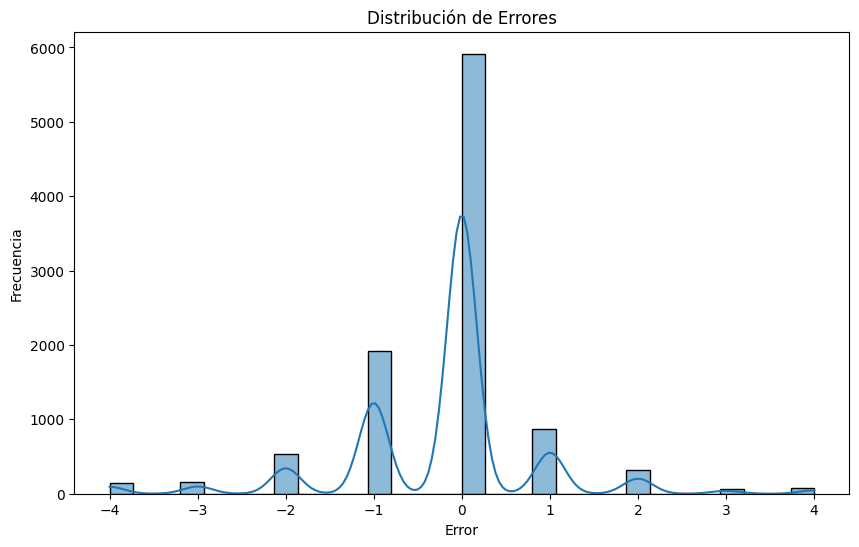

Accuracy: 0.5916


In [30]:
# Calcular errores
predicted_labels = predicted_labels.flatten()
print(predicted_labels)
y_test = test_labels #[1 if x == 'positive' else 0 for x in test_labels]
y_pred = predicted_labels #[1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Preguntas
### 1. ¿Qué hace el código en general?
### R./ El código en general es un clasificador de sentimientos a partir de reviews de películas.
###2. ¿Cuál es el propósito de cada parte del código?
### R./ El código inicia descargando el dataset desde Kaggle y descomprimiendo este, se ejecuta una limpieza de stopwords y etiquetas html para evitar que entrene el modelo de forma incorrecta, se entrena un modelo RNN para la clasificación de sentimientos para las reviews que contiene el dataset. Finalmente se muestran las métricas para ver los resultados del modelo y hacer la evaluación del mismo.
###3. ¿Por qué se utilizan los parámetros especícos en cada función (por ejemplo,num_words, embedding_dim, input_length, loss, optimizer, etc.)?
### R./ Estos parámetros van a definir la arquitectura del modelo y como se comportará en su proceso de entrenamiento:
###**num_words**
**Descripción:** Especifica el número máximo de palabras a considerar en el vocabulario del modelo.

**Importancia:** Limitar el vocabulario ayuda a manejar la complejidad y la memoria, especialmente cuando se trabaja con grandes corpus de texto. Este parámetro se utiliza para asegurarse de que solo las palabras más frecuentes se incluyan en el vocabulario del modelo.

### **embedding_dim**
**Descripción:** Define la dimensión del vector de incrustación para cada palabra.

**Importancia:** Las incrustaciones de palabras (word embeddings) son representaciones vectoriales densas de palabras en un espacio de alta dimensión. La dimensión de estas incrustaciones determina la cantidad de información que pueden capturar. Dimensiones más altas pueden capturar más matices pero requieren más recursos computacionales.
### **input_length**
**Descripción:** Especifica la longitud máxima de las secuencias de entrada que el modelo aceptará.

**Importancia:** Establecer una longitud fija de entrada es crucial para procesar las secuencias de manera eficiente en lotes (batches). Las secuencias más cortas se rellenan (padding) y las más largas se truncan para cumplir con esta longitud fija.
###**loss**
**Descripción:** Especifica la función de pérdida que se utilizará durante el entrenamiento.

**Importancia:** La función de pérdida cuantifica la diferencia entre las predicciones del modelo y los valores reales. Minimizar esta pérdida durante el entrenamiento guía al modelo a mejorar su rendimiento. Diferentes tareas (clasificación, regresión, etc.) requieren diferentes funciones de pérdida (e.g., categorical_crossentropy, mean_squared_error).
###**optimizer**
**Descripción:** Define el algoritmo que se utilizará para actualizar los pesos del modelo durante el entrenamiento.

**Importancia:** Los optimizadores controlan la manera en que el modelo ajusta sus pesos para minimizar la pérdida. Diferentes optimizadores (e.g., SGD, Adam, RMSprop) tienen diferentes características y pueden influir significativamente en la velocidad y la estabilidad del entrenamiento.
###4. ¿Cuál es la diferencia entre train_sentences y test_sentences?
### R./ train_sentences es un subdataset que se usa para el entramiento del modelo y es de mayor dimensión que el subdataset test_sentences que sirve para evaluar el comportamiento del modelo durante el entrenamiento y posterior a este.
###5. ¿Qué signican vocab_size, max_length, embedding_dim y oov_tok?
### R./**vocab_size**
**Descripción:** El tamaño del vocabulario que el modelo considerará.

**Importancia:** vocab_size limita el número de palabras únicas que se mantendrán en el vocabulario del modelo. Las palabras más frecuentes se mantienen y las menos frecuentes se descartan. Esto ayuda a reducir la complejidad del modelo y el uso de memoria.
###max_length
**Descripción:** La longitud máxima de las secuencias de entrada que el modelo aceptará.

**Importancia:** max_length establece una longitud fija para todas las secuencias de entrada. Las secuencias más cortas se rellenan (padding) y las más largas se truncan para cumplir con esta longitud fija. Esto es crucial para procesar secuencias de manera eficiente en lotes (batches) durante el entrenamiento.
###**embedding_dim
**Descripción:** La dimensión de los vectores de incrustación (embeddings) para cada palabra.

**Importancia:** Las incrustaciones de palabras (word embeddings) son representaciones vectoriales densas de palabras en un espacio de alta dimensión. La dimensión de estas incrustaciones determina la cantidad de información que pueden capturar. Dimensiones más altas pueden capturar más matices del significado de las palabras pero requieren más recursos computacionales.
###**oov_tok (Out-Of-Vocabulary Token)**
**Descripción:** Un token especial para palabras fuera del vocabulario (Out-Of-Vocabulary, OOV).

**Importancia:** oov_tok se utiliza para representar cualquier palabra que no esté en el vocabulario del modelo. Esto es útil para manejar palabras nuevas o raras que no se encontraron durante el entrenamiento.
###6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?
### R./**Capa Embedding**
**Descripción:** La capa Embedding convierte las secuencias de enteros (índices de palabras) en matrices de vectores densos (incrustaciones) de dimensión fija.

**Función:** Esta capa aprende una representación densa y continua para cada palabra en el vocabulario durante el entrenamiento. Cada palabra se representa como un vector de alta dimensión en el que se capturan relaciones semánticas.

**Importancia:** Las incrustaciones de palabras son cruciales para representar palabras de manera que el modelo pueda aprender similitudes y relaciones entre ellas. Las representaciones densas son más eficientes y expresivas en comparación con las representaciones dispersas (one-hot encoding).
### **Capa Flatten**
**Descripción:** La capa Flatten convierte una matriz multidimensional en un vector unidimensional.

**Función:** Después de la capa Embedding, los datos tienen la forma de una matriz tridimensional (batch_size, input_length, embedding_dim). Flatten aplana esta matriz para que se pueda alimentar a una capa densa (fully connected).

**Importancia:** La capa Flatten es esencial para conectar las representaciones de incrustación con las capas densas que siguen en la red.
### **Capa Dense**
**Descripción:** La capa Dense es una capa completamente conectada donde cada neurona está conectada a todas las neuronas de la capa anterior.

**Función:** Realiza la transformación afín seguida de una función de activación no lineal. Es utilizada para aprender características complejas y tomar decisiones basadas en las entradas transformadas.

**Importancia:** Las capas densas son fundamentales para aprender combinaciones de características y realizar la clasificación o regresión al final del modelo.
### **Capa Sigmoid**
**Descripción:** La función de activación sigmoid comprime la salida de la neurona a un rango entre 0 y 1.

**Función:** Transforma la salida de la capa densa en probabilidades. Es especialmente útil para tareas de clasificación binaria donde se necesita una probabilidad de pertenencia a una clase.

**Importancia:** La función sigmoid es ideal para la salida de una red neuronal en problemas de clasificación binaria, ya que convierte la salida en una probabilidad, facilitando la interpretación y la evaluación.
###7. ¿Qué representan las métricas de pérdida y precisión en el modelo?
**Pérdida:** Mide el error del modelo; es la diferencia entre las predicciones y los valores reales.

**Precisión:** Indica la proporción de predicciones correctas sobre el total de predicciones realizadas.
###8. ¿Qué pasa durante el entrenamiento del modelo?
El modelo ajusta sus pesos mediante la retropropagación para minimizar la pérdida, mejorando así su capacidad para hacer predicciones precisas.
###9. ¿Qué significan las épocas y cómo afectan al proceso de entrenamiento?
**Épocas:** Número de veces que el modelo pasa por todo el conjunto de datos de entrenamiento.
Más épocas permiten un aprendizaje más profundo, pero demasiadas pueden llevar al sobreajuste.
###10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?
Garantiza que el modelo generaliza bien a datos no vistos, ayudando a detectar el sobreajuste y evaluar el rendimiento real del modelo.
###11. ¿Cuál es el objetivo final del código?
Entrenar un modelo de aprendizaje profundo para realizar tareas específicas (e.g., clasificación de texto) con un rendimiento óptimo y validado adecuadamente.